# <center> SPEECH CLASSIFICATION <CENTER>

### OBJECTIVE:
Implement LDA in IRIS dataset having 4 
features to decrease the number of features to one/two. Now using this 
modified dataset, try to learn a classifier to test the performance of LDA for dimensionality 
reduction

### LDA:
 LDA is a classification method that operates by projecting a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting and to reduce computational costs. It has been widely used in the fields of pattern recognition, machine learning, and bioinformatics.

### Importing Libraries

In [148]:
import pandas as pd# read the dataset
import numpy as np# operations with arrays
import os#handling files
import matplotlib.pyplot as plt# visvuvalise the data in the form of graph
import seaborn as sns#graph module to plot the graph in a single line

### Loading the Dataset

In [149]:
df=pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Preprocessing

In [150]:
#to describe the stats about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [151]:
#basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [152]:
#to display no of samples in each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [153]:
#check null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Exploratory Data Analysis

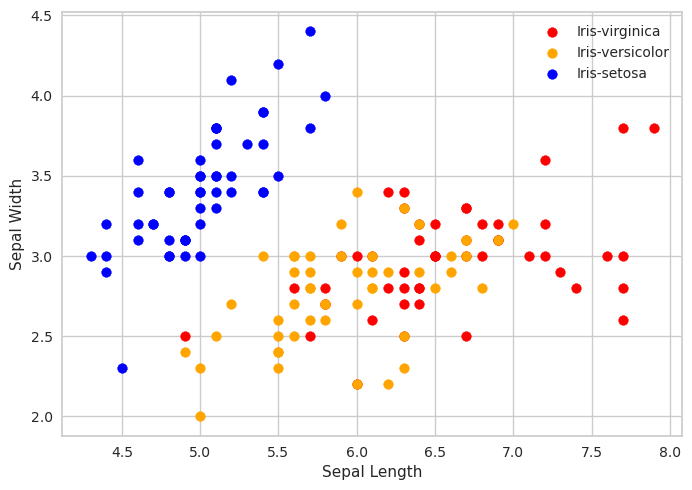

In [154]:
#scatter plot for each class
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']
#df.plot(kind='scatter',x='sepal_length',y='sepal_width') as this plots without the class classification
#we use a for loop
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

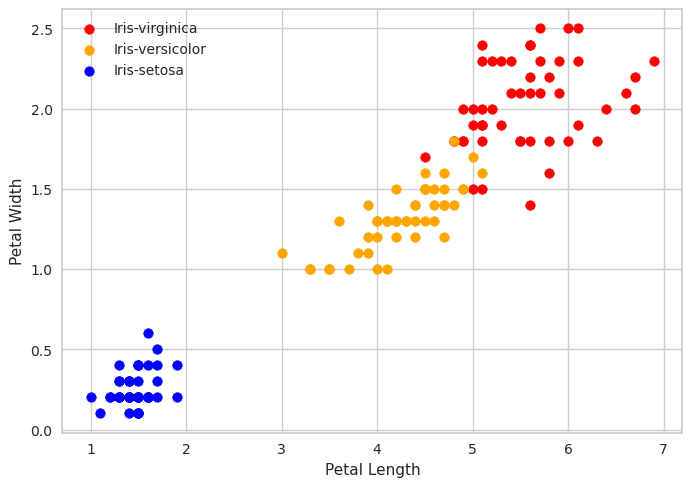

In [155]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend()


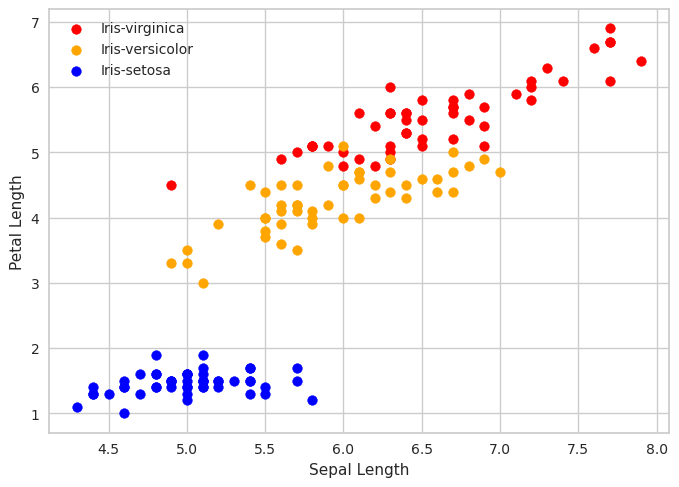

In [156]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()


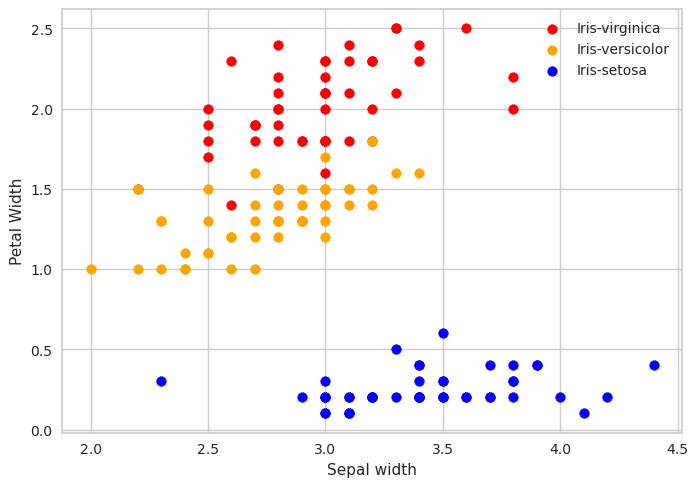

In [157]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
    plt.xlabel('Sepal width')
    plt.ylabel('Petal Width')
    plt.legend()

Sepal Length vs. Sepal Width: There's some overlap between the species, but it's clear that Setosa generally has shorter and wider sepals compared to the other two species.

Petal Length vs.Petal Width: This pair of features clearly differentiates the species. Setosa has shorter and narrower petals, Versicolor has medium-length and medium-width petals, and Virginica has the longest and widest petals.

Sepal Length vs. Petal Length : These plots show that Setosa has shorter sepals and petals, while Virginica has the longest sepals and petals. Versicolor falls in between.

Sepal Width vs. Petal Width: These plots show that Setosa has wider sepals and shorter petals. On the other hand, Virginica has narrower sepals and longer petals. Versicolor falls in between.

In [158]:
corr=df.corr()
corr

/tmp/ipykernel_32/3182140910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

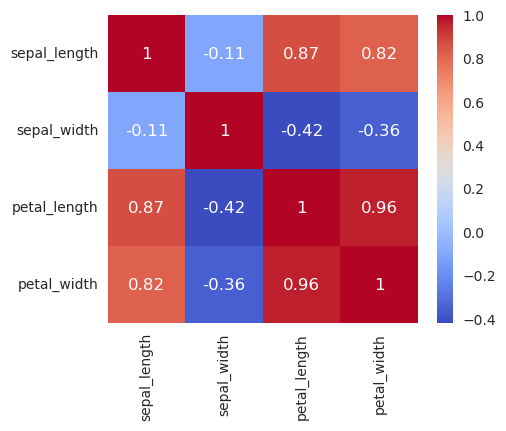

In [159]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

### Generate Dummy Dataset 

In [160]:
x=df.drop(columns=['species'])
y=df['species']

In [161]:
features=x.columns.tolist()
target=y.unique().tolist()
print("Feature Names:", features)
print("Target Names:", target)

Feature Names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Target Names: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


### Standardize the Data:
Standardizing the data is an important step to ensure that features are on the same scale, which helps algorithms like LDA to perform optimally.

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [163]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)  # You can choose 1 or 2 components
X_lda = lda.fit_transform(X_scaled, y)

### Visualize the Reduced Data:
Visualize the reduced data to see how LDA transformed the features.
python

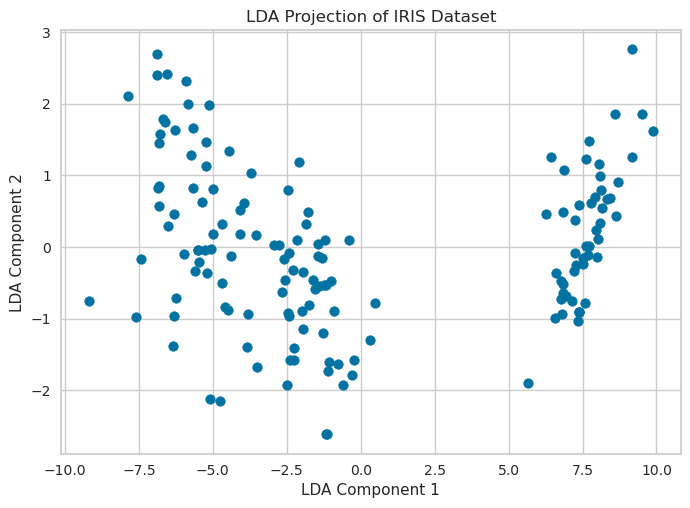

In [164]:
import matplotlib.pyplot as plt
plt.scatter(X_lda[:, 0], X_lda[:, 1])
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Projection of IRIS Dataset')
plt.show()


### Train a Classifier:
Now, let's use the reduced dataset to train a classifier and evaluate its performance.

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)


### LOGISTIC REGRESSION

In [166]:
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [167]:
y_pred= classifier.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(" Accuracy Score Using Logistic Regression Classifier", accuracy)

 Accuracy Score Using Logistic Regression Classifier 1.0


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



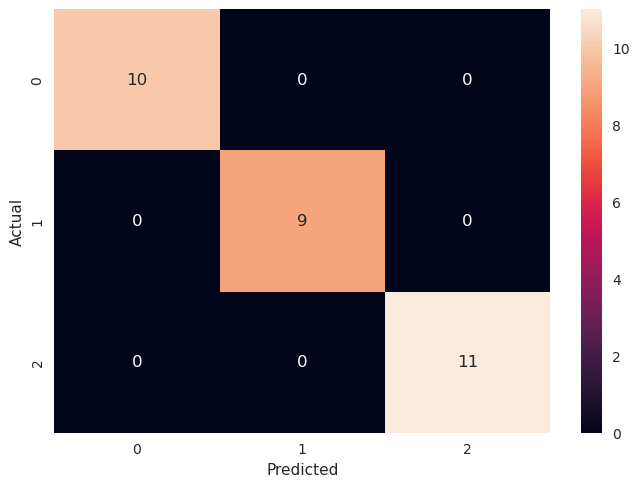

In [168]:
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [169]:
from sklearn.metrics import classification_report, confusion_matrix

### KNN classification

In [170]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
acc = knn.score(X_test,y_test)
print('The accuracy of KNN on the original dataset : {}'.format(acc))

The accuracy of KNN on the original dataset : 1.0


In [171]:
y_pred1= knn.predict(X_test)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



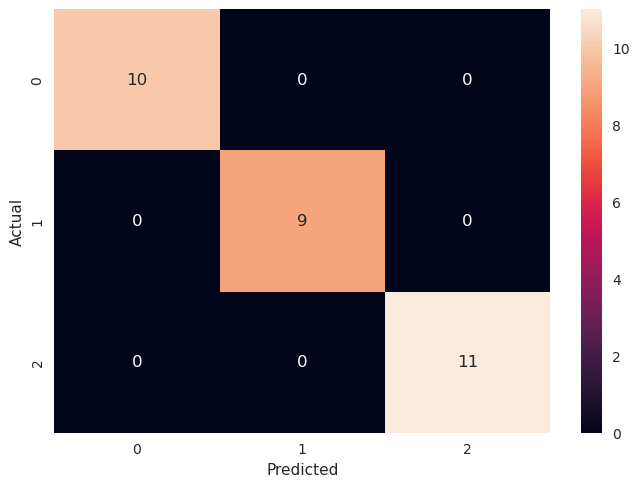

In [172]:
print(classification_report(y_test, y_pred1))
conf_mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Converting into 1D and checking the accuracy

In [173]:
lda1=LinearDiscriminantAnalysis(n_components=1)
X_lda1 = lda1.fit(X_train, y_train)
x_train_mod1=lda1.transform(X_train)
x_test_mod1=lda1.transform(X_test)

knn.fit(x_train_mod1,y_train)
acc1=knn.score(x_test_mod1,y_test)
print('The accuracy of KNN after LDA on the original dataset : {}'.format(acc1))

The accuracy of KNN after LDA on the original dataset : 1.0
